Labo 5 ISD - Alexandre Jaquier et Valentin Kaelin

# 1. Régression linéaire simple

**1)** Installez la bibliothèque sklearn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from random import randrange, seed

**2)** Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [2]:
boston_dataset = load_boston()
boston_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame['MEDV'] = boston_dataset.target

boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3)** Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).  
Générez un histogramme de la distribution de la variable indépendente.

In [27]:
print(boston_frame.count())
print("-----------------------------------")
print(boston_frame.dropna().count())
print("-----------------------------------")
print(boston_frame.isnull().sum())

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [25]:
print(boston_frame.columns)
print(len(boston_frame.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


Text(0, 0.5, 'Numbers of owner-occupied homes')

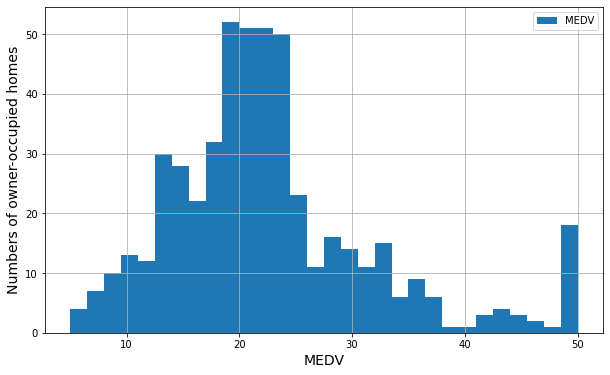

In [38]:
#print(boston_frame['MEDV'])
plot = pd.plotting.hist_series(boston_frame['MEDV'], legend=True, figsize=(10, 6), bins=30)
plot.set_title('', fontsize=15)
plot.set_xlabel('MEDV', fontsize=14)
plot.set_ylabel('Numbers of owner-occupied homes', fontsize=14)
#plot.set_yscale('log')

**4)** Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.  
Commentez vos observations.

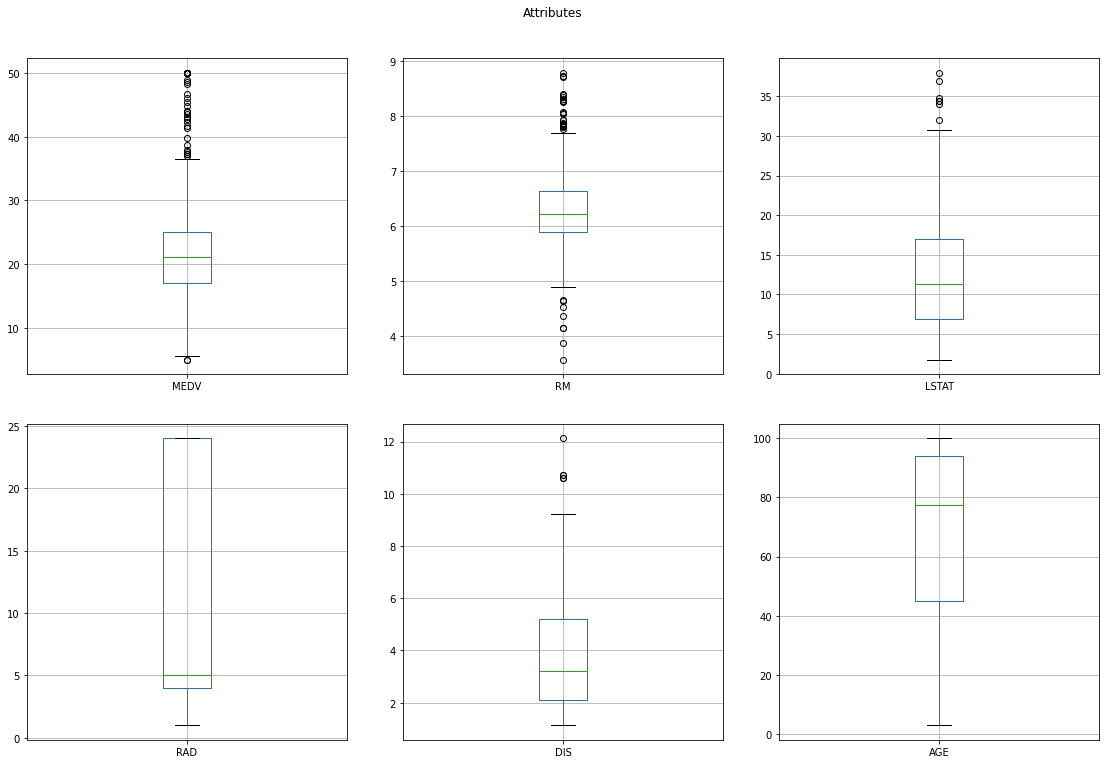

In [49]:
labels_to_show = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
columns_to_show = boston_frame[labels_to_show].columns

fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))
for col in range(9):
    if(col < len(columns_to_show)):
        boston_frame.boxplot(columns_to_show[col], ax=axes[col // 3, col % 3])
    else:
        fig.delaxes(axes[col // 3, col % 3])
    
fig.suptitle('Attributes')
plt.tight_layout(pad=3)

On observe que certains attributs sont mieux répartis que d'autres. L'attribut RAD par exemple n'est pas très utile.  
Certains attributs comme MEDV ou RM possèdent de nombreux outliers.

**5)** Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,
chaque fois utilisant seulement une des variables.  

Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer
la performance moyenne du modèle.

Commentez vos résultats.

In [55]:
seed(42)

def split_test_set(dataset, ratio):
    test_set_split = list()
    copy = list(dataset)
    test_size = int(len(dataset) * ratio)
    while len(test_set_split) < test_size:
        i = randrange(len(copy))
        test_set_split.append(copy.pop(i))
    return test_set_split, copy

# On garde 1/4 des données pour la validation finale
boston_test, boston_train_validation = split_test_set(boston_frame.values.tolist(), 0.20)

In [53]:
linear_regression_attributes = ['RM', 'RAD', 'LSTAT']

def compute_MSE(b, m, data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

#Step 1: Collecter les données
#data = genfromtxt('data.csv', delimiter=',')

# TODO: check ce qu'il faut donner à data, pas une liste vu l'erreur ??
#data = boston_frame[['RM', 'MEDV']].values.tolist()
#data = np.array([[1, 2], [3, 4], [5, 6]])
data =  np.array(boston_frame[['RM', 'MEDV']].values.tolist())
#print(data[0, 1])

#Step 2: On choisit les hyperparamètres
#learning_rate = 0.0001
#num_epochs = 50
learning_rate = 0.03
num_epochs = 50

#Step 3: On initialise la valeur de m et de b
initial_b = np.random.rand(1) # intercept
initial_m = np.random.rand(1) # pente

#Step 4: On applique la méthode du gradient descendant
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m,
compute_MSE(initial_b, initial_m, data)))
print("Running...")
[b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
print("After {0} epochs b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, data)))

Starting gradient descent at b = [0.48600925], m = [0.07156582], error = [550.21198915]
Running...
After 0 epochs b = [1.13392021], m = [4.27692849], error = [85.10256404]
After 1 epochs b = [0.96951884], m = [3.31504627], error = [60.63303478]
After 2 epochs b = [0.99140185], m = [3.53811074], error = [59.33553922]
After 3 epochs b = [0.97057201], m = [3.48944348], error = [59.25660415]
After 4 epochs b = [0.95954275], m = [3.50308858], error = [59.24175751]
After 5 epochs b = [0.94627172], m = [3.50244338], error = [59.23028881]
After 6 epochs b = [0.93352048], m = [3.50507432], error = [59.21900546]
After 7 epochs b = [0.92065574], m = [3.50695308], error = [59.20773956]
After 8 epochs b = [0.90782272], m = [3.50900344], error = [59.19648228]
After 9 epochs b = [0.89498811], m = [3.51101355], error = [59.18523314]
After 10 epochs b = [0.88215957], m = [3.51303199], error = [59.17399212]
After 11 epochs b = [0.86933532], m = [3.51504763], error = [59.1627592]
After 12 epochs b = [0.8

"\nfig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))\n\nfor i in range(len(linear_regression_attributes)):\n    x_data = boston_frame[linear_regression_attributes[i]]\n    ax[i].scatter(x_data, boston_frame['MEDV'])\n    x = np.arange(x_data.min(), x_data.max(), 0.5)\n    ax[i].plot(x, m*x + b, 'r')\n    ax[i].set_xlabel(linear_regression_attributes[i])\n    ax[i].set_ylabel('MEDV')\n"

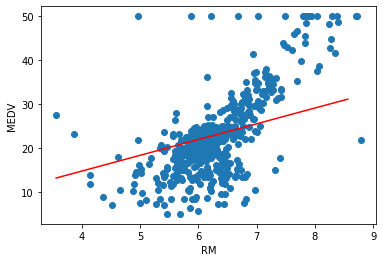

In [54]:
# TEMPO
linear_regression_attributes = ['RM']

x_data = boston_frame[linear_regression_attributes[0]]
plt.scatter(x_data, boston_frame['MEDV'])
x = np.arange(x_data.min(), x_data.max(), 0.5)
plt.plot(x, m*x + b, 'r')
plt.xlabel(linear_regression_attributes[i])
plt.ylabel('MEDV')


# Une fois qu'on aura les 3 variables à la suite
'''
fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))

for i in range(len(linear_regression_attributes)):
    x_data = boston_frame[linear_regression_attributes[i]]
    ax[i].scatter(x_data, boston_frame['MEDV'])
    x = np.arange(x_data.min(), x_data.max(), 0.5)
    ax[i].plot(x, m*x + b, 'r')
    ax[i].set_xlabel(linear_regression_attributes[i])
    ax[i].set_ylabel('MEDV')
'''